### 1. Introduction

This notebook applies a Reinforcement Learning algorithm -- Deep Q-Learning -- to create a trading bot that takes the optimal action -- buys, sells, or holds -- based on the current market state of the stock.

### 2. Loading Data

In [1]:
import yfinance as yf
import pandas as pd

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
data = sp500.history(period="10y", interval="1d", actions=False)
data = data.reset_index()

print(data.head())

# Log to CSV
data.to_csv('sp500_historical_data_yfinance.csv', index=False)

del sp500

                       Date         Open         High          Low  \
0 2014-09-02 00:00:00-04:00  2004.069946  2006.119995  1994.849976   
1 2014-09-03 00:00:00-04:00  2003.569946  2009.280029  1998.140015   
2 2014-09-04 00:00:00-04:00  2001.670044  2011.170044  1992.540039   
3 2014-09-05 00:00:00-04:00  1998.000000  2007.709961  1990.099976   
4 2014-09-08 00:00:00-04:00  2007.170044  2007.170044  1995.599976   

         Close      Volume  
0  2002.280029  2819980000  
1  2000.719971  2809980000  
2  1997.650024  3072410000  
3  2007.709961  2818300000  
4  2001.540039  2789090000  



### 3. Preparing Data

In [2]:
# Checking for any filling in any null values
print("Dataset type: " + str(type(data)))

if (data.isnull().values.any()):
    print("Dataset has null values", "filtering now...")
    data = data.fillna(method="ffill")
else:
    print("No null values")

Dataset type: <class 'pandas.core.frame.DataFrame'>
No null values


In [3]:
# 80/20 Train/Test Split 
TEST_SPLIT_RATIO = 0.2

X = [float(x) for x in list(data["Close"])]

train_size = int(len(X) * (1 - TEST_SPLIT_RATIO))
X_train, X_test = X[0:train_size], X[train_size:len(X)]

print("Number of training samples: " + str(len(X_train)))
print("Number of test samples: " + str(len(X_test)))

Number of training samples: 2013
Number of test samples: 504



### 4. Training

episode: 1/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 2/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 3/10


  0%|          | 0/2012 [00:00<?, ?it/s]

Epsilon: 0.471245423885521
--------------------------------
Total Profit: $556.50
--------------------------------


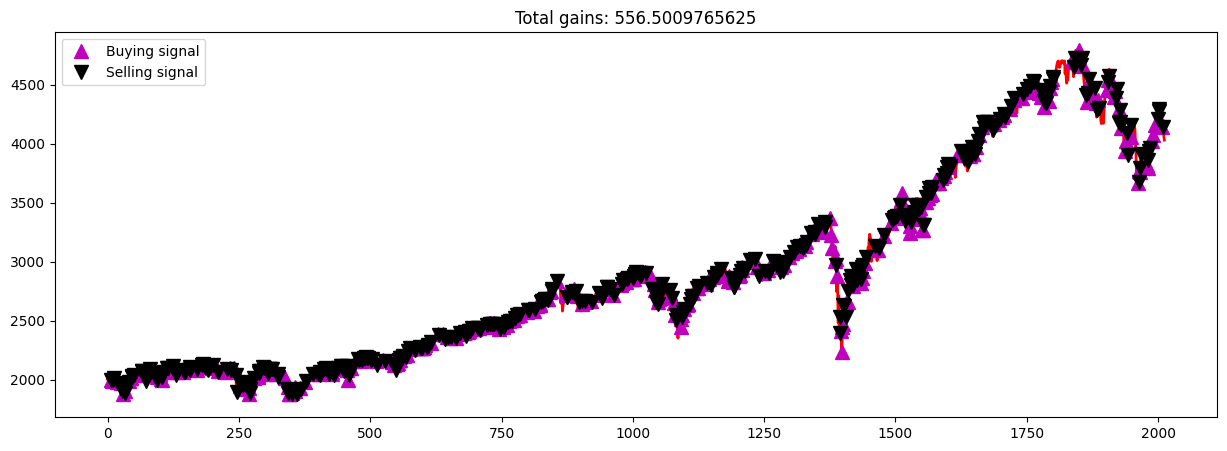

episode: 4/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 5/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 6/10


  0%|          | 0/2012 [00:00<?, ?it/s]

Epsilon: 0.22118529208034285
--------------------------------
Total Profit: $2030.11
--------------------------------


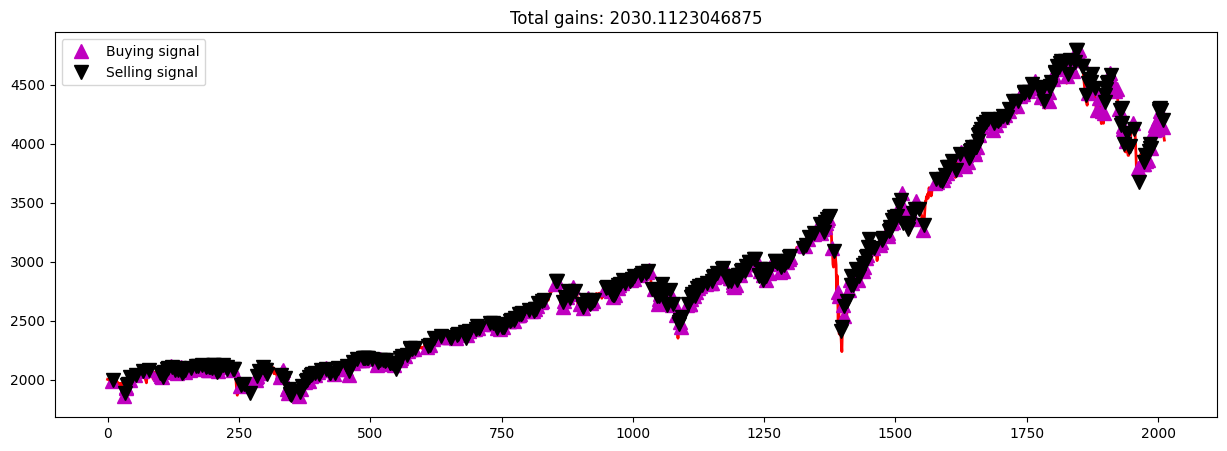

episode: 7/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 8/10


  0%|          | 0/2012 [00:00<?, ?it/s]

episode: 9/10


  0%|          | 0/2012 [00:00<?, ?it/s]

Epsilon: 0.10381625147526369
--------------------------------
Total Profit: $7292.15
--------------------------------


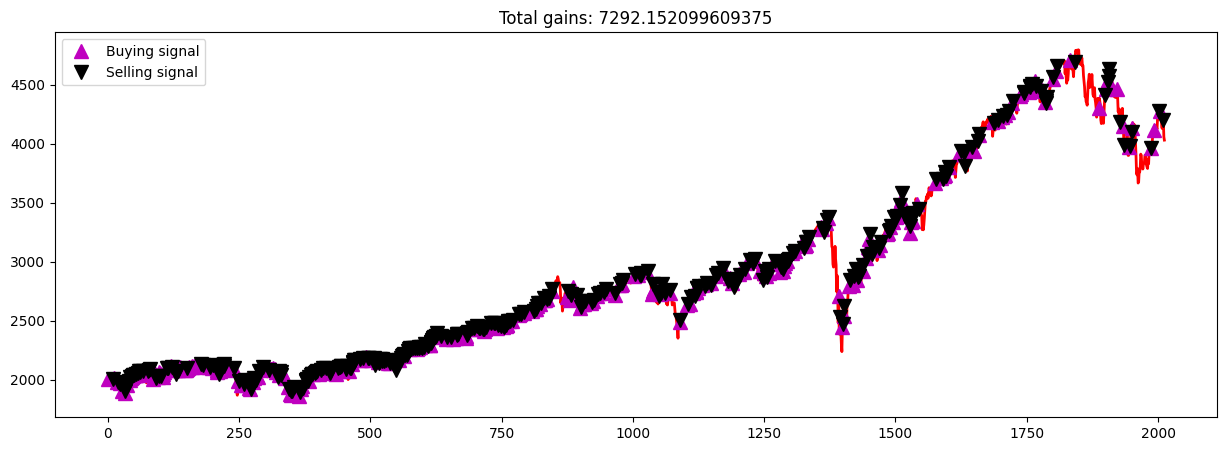

episode: 10/10


  0%|          | 0/2012 [00:00<?, ?it/s]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,555 (9.98 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,704 (6.66 KB)

None


In [4]:
import ipywidgets as widgets
import DeepQLearningAgent
from DeepQLearningAgent import Agent

WINDOW_SIZE = 4
BATCHSIZE = 32
NUM_EPISODES = 10
REPLAY_STEPS = 8
LOGGING_STEPS = SAVE_STEPS = 3
CHECKPOINTS_FOLDER = "checkpoints"
TRAINED_MODEL_NAME = "model_final.keras"

agent = Agent(X_train=X_train,
              X_eval=X_test,
              batchsize=BATCHSIZE,
              is_eval=False,
              state_size=WINDOW_SIZE)

agent.train(num_episodes=NUM_EPISODES, 
            replay_steps=REPLAY_STEPS,
            save_steps=SAVE_STEPS,
            logging_steps=LOGGING_STEPS,
            checkpoints_folder=CHECKPOINTS_FOLDER,
            model_name=TRAINED_MODEL_NAME)

print(agent.model.summary())

### 5. Testing Model

  0%|          | 0/503 [00:00<?, ?it/s]

Buy: $3979.87
Sell: $4006.18 | profit: $26.31
Buy: $3932.69
Sell: $3946.01 | profit: $13.32
Buy: $3873.33
Buy: $3899.89
Buy: $3678.43
Sell: $3790.93 | profit: $112.50
Buy: $3588.84
Sell: $3677.95 | profit: $89.11
Sell: $3719.98 | profit: -$153.35
Sell: $3752.75 | profit: -$147.14
Buy: $3830.60
Buy: $3901.06
Sell: $3806.80 | profit: -$23.80
Sell: $3828.11 | profit: -$72.95
Buy: $3748.57
Sell: $3956.37 | profit: $207.80
Buy: $3965.34
Buy: $3949.94
Sell: $4003.58 | profit: $53.64
Sell: $4027.26 | profit: $61.92
Buy: $3849.28
Buy: $3852.97
Sell: $3895.08 | profit: $45.80
Sell: $3919.25 | profit: $66.28
Buy: $3990.97
Sell: $4019.81 | profit: $28.84
Buy: $4016.95
Sell: $4060.43 | profit: $43.48
Buy: $4017.77
Sell: $4076.60 | profit: $58.83
Buy: $4136.48
Buy: $4164.00
Buy: $4090.46
Sell: $4137.29 | profit: $46.83
Sell: $4136.13 | profit: -$0.35
Sell: $4147.60 | profit: -$16.40
Buy: $3981.35
Sell: $4045.64 | profit: $64.29
Buy: $3986.37
Sell: $3992.01 | profit: $5.64
Buy: $4002.87
Sell: $3948.

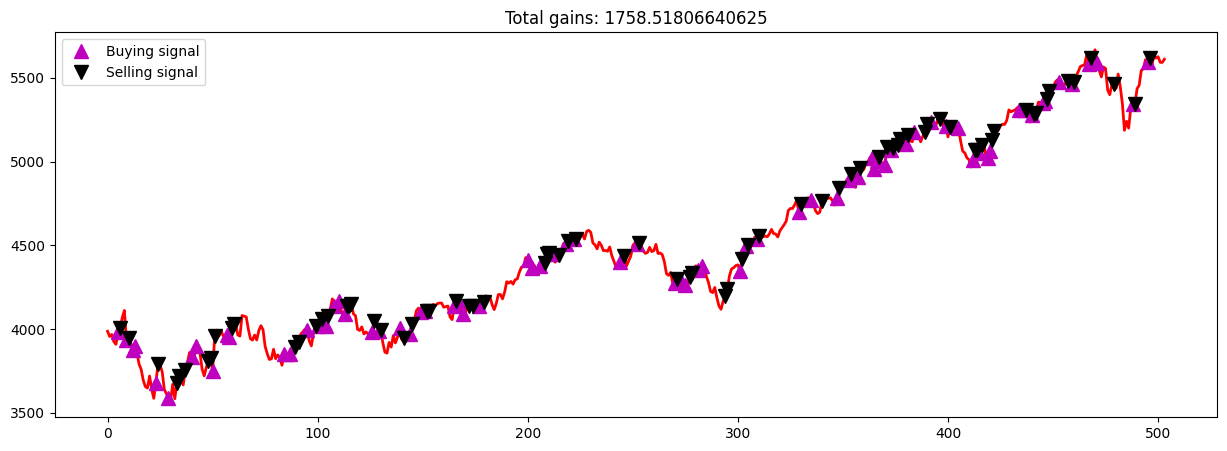

In [6]:
agent.eval()